In [91]:

import pandas as pd


df = pd.read_csv(r'spam.csv',encoding='ISO-8859-1')

df.rename(columns = {'v1':'class_label', 'v2':'message'}, inplace = True)
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)



df

,class_label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [92]:
#exploring the dataset
df['class_label'].value_counts()

ham     4825
spam     747
Name: class_label, dtype: int64

In [93]:
#exploratory data analysis
#bar chart for initial data
import matplotlib.pyplot as ab
import numpy as np
labels = ['ham', 'spam']
counts = [4825, 747]
ypos = np.arange(len(labels)) #converting text labels to numberic value, 0 and 1
ypos

array([0, 1])

<BarContainer object of 2 artists>

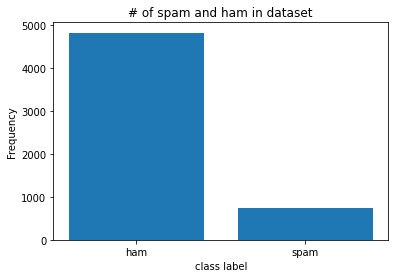

In [94]:
ab.xticks(ypos, labels)
ab.xlabel("class label")
ab.ylabel("Frequency")
ab.title("# of spam and ham in dataset")
ab.bar(ypos, counts)

In [95]:

df

,class_label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [96]:
#separate both classes
df_ham = df[df.class_label=='ham']
df_spam = df[df.class_label=='spam']

#convert to list

ham_list=df_ham['message'].tolist()
spam_list= df_spam['message'].tolist()


filtered_spam = ("").join(spam_list) #convert the list into a string of spam
filtered_spam = filtered_spam.lower()

filtered_ham = ("").join(ham_list) #convert the list into a string of ham
filtered_ham = filtered_ham.lower()

In [97]:
import os
from wordcloud import WordCloud
from PIL import Image
comment_mask = np.array(Image.open("comment.png"))


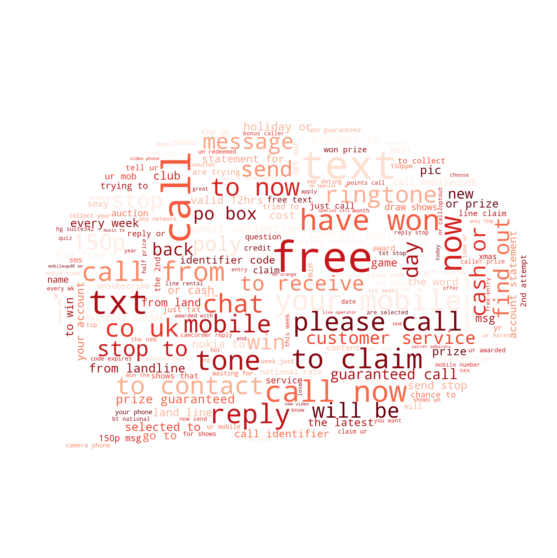

In [98]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size = 160, margin=0, mask = comment_mask, background_color = "white", colormap="Reds").generate(filtered_spam)
 
# Display the generated image

ab.figure(figsize=[20,10])
ab.imshow(wordcloud, interpolation='bilinear')
ab.axis("off")

ab.margins(x=0, y=0)

ab.show()


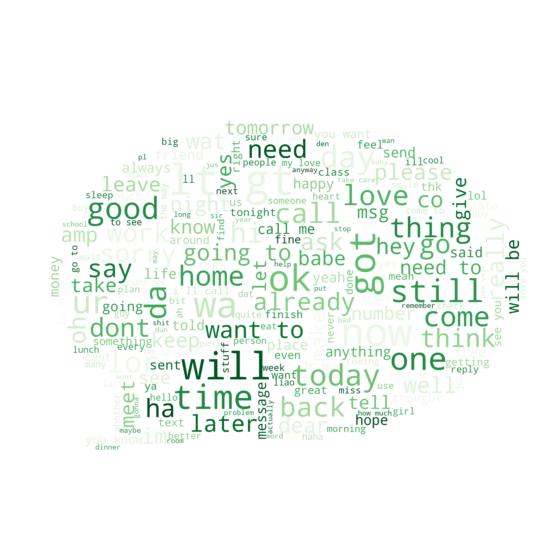

In [99]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size = 160, margin=0, mask = comment_mask, background_color = "white", colormap="Greens").generate(filtered_ham)
 
# Display the generated image

ab.figure(figsize=[20,10])
ab.imshow(wordcloud, interpolation='bilinear')
ab.axis("off")

ab.margins(x=0, y=0)

ab.show()

In [100]:
df['class_label'] = df['class_label'].apply(lambda x: 1 if x == 'spam' else 0)


In [101]:
from sklearn.model_selection import train_test_split
# 30% test, 70% train split
x_train, x_test, y_train, y_test = train_test_split(df['message'], df['class_label'], test_size = 0.3, random_state = 0)

print('rows in test set: ' + str(x_test.shape))
print('rows in train set: ' + str(x_train.shape))
type(x_train)

rows in test set: (1672,)
rows in train set: (3900,)


pandas.core.series.Series

# tfidf Vectorizer cell

In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer

# vectorize email text into tfidf matrix
# TfidfVectorizer converts collection of raw documents to a matrix of TF-IDF features.
# It's equivalent to CountVectorizer followed by TfidfTransformer.
list = x_train.tolist()
vectorizer = TfidfVectorizer(
    input= list ,  # input is actual text
    lowercase=True,      # convert to lower case before tokenizing
    stop_words='english' # remove stop words
)
features_train_transformed = vectorizer.fit_transform(list) #gives tf idf vector
features_test_transformed  = vectorizer.transform(x_test) #gives tf idf vector

In [103]:
from sklearn.naive_bayes import MultinomialNB

# train a classifier
classifier = MultinomialNB()
classifier.fit(features_train_transformed, y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [104]:
# review the classifier accuracy
print("classifier accuracy {:.2f}%".format(classifier.score(features_test_transformed, y_test) * 100))

classifier accuracy 96.35%


In [105]:
labels = classifier.predict(features_test_transformed)
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
  
actual = y_test.tolist() 
predicted = labels 
results = confusion_matrix(actual, predicted) 
  
print('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(actual, predicted)) 
print ('Report : ')
print (classification_report(actual, predicted) )

score_2 = f1_score(actual, predicted, average = 'binary')
print('F-Measure: %.3f' % score_2)

Confusion Matrix :
[[1434    0]
 [  61  177]]
Accuracy Score : 0.9635167464114832
Report : 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1434
           1       1.00      0.74      0.85       238

    accuracy                           0.96      1672
   macro avg       0.98      0.87      0.92      1672
weighted avg       0.97      0.96      0.96      1672

F-Measure: 0.853


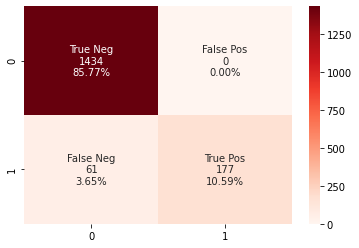

In [106]:
#heatmap for confusion matrix
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                results.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     results.flatten()/np.sum(results)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(results, annot=labels, fmt='', cmap='Reds')

# count vectorizer cell

In [107]:
list = x_train.tolist()
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(strip_accents = ascii) #initialize countVectorizer.
word_count_vector=cv.fit_transform(list) #get the document-term matrix.
print(word_count_vector.shape) #see the rows and columns of this matrix







(3900, 7131)


In [108]:
cv.vocabulary_

{'mathews': 3970,
 'or': 4502,
 'tait': 6066,
 'edwards': 2311,
 'anderson': 844,
 'ok': 4449,
 'take': 6069,
 'care': 1489,
 'umma': 6480,
 'to': 6297,
 'you': 7099,
 'too': 6333,
 'don': 2197,
 'make': 3920,
 'life': 3714,
 'stressfull': 5913,
 'always': 818,
 'find': 2589,
 'time': 6267,
 'laugh': 3652,
 'it': 3417,
 'may': 3982,
 'not': 4371,
 'add': 703,
 'years': 7074,
 'your': 7104,
 'but': 1411,
 'surely': 6009,
 'adds': 710,
 'more': 4144,
 'ur': 6542,
 'gud': 2971,
 'ni8': 4313,
 'swt': 6044,
 'dreams': 2234,
 'great': 2944,
 'new': 4304,
 'offer': 4434,
 'double': 2212,
 'mins': 4069,
 'txt': 6448,
 'on': 4465,
 'best': 1180,
 'orange': 4506,
 'tariffs': 6091,
 'and': 843,
 'get': 2832,
 'latest': 3650,
 'camera': 1460,
 'phones': 4701,
 'free': 2704,
 'call': 1442,
 'mobileupd8': 4111,
 '08000839402': 45,
 'now': 4383,
 '2stoptxt': 365,
 'cs': 1905,
 'the': 6186,
 'beauty': 1138,
 'of': 4428,
 'is': 3407,
 'in': 3310,
 'next': 4311,
 'second': 5410,
 'which': 6813,
 'hides'

In [109]:
x_test_vector = cv.transform(x_test)

In [110]:


# train a classifier
classifier = MultinomialNB()
classifier.fit(word_count_vector, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [111]:
# review the classifier accuracy
print("classifier accuracy {:.2f}%".format(classifier.score(x_test_vector, y_test) * 100))

classifier accuracy 98.50%


In [112]:
labels = classifier.predict(x_test_vector)


  
actual = y_test
predicted = labels 
results = confusion_matrix(actual, predicted) 
  
print('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(actual, predicted)) 
print ('Report : ')
print (classification_report(actual, predicted) )
score_2 = f1_score(actual, predicted, average = 'binary')
print('F-Measure: %.3f' % score_2)

Confusion Matrix :
[[1427    7]
 [  18  220]]
Accuracy Score : 0.9850478468899522
Report : 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1434
           1       0.97      0.92      0.95       238

    accuracy                           0.99      1672
   macro avg       0.98      0.96      0.97      1672
weighted avg       0.98      0.99      0.98      1672

F-Measure: 0.946


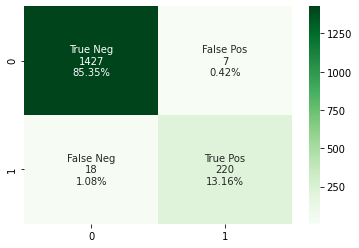

In [113]:
#heatmap for confusion matrix

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                results.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     results.flatten()/np.sum(results)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(results, annot=labels, fmt='', cmap='Greens')

In [114]:
#Implementing cross validation on both the models 

#THIS CELL USES CROSS VALIDATION FOR COUNT VECTORIZER 

#%pip install scikit-learn

#%conda upgrade scikit-learn


from sklearn.model_selection import cross_val_score

X=df["message"].tolist()
Y=df["class_label"].tolist()
df

classifier = MultinomialNB()

cv = CountVectorizer(strip_accents = ascii) #initialize countVectorizer.
word_count_vector=cv.fit_transform(X) #get the document-term matrix.
#print(word_count_vector.shape) #see the rows and columns of this matrix

scores=cross_val_score(classifier,word_count_vector,Y,cv=10,scoring='accuracy')

print(scores)

print(scores.mean())



[0.98387097 0.97849462 0.98207885 0.98566308 0.98028674 0.98204668
 0.98384201 0.98561151 0.97302158 0.99100719]
0.9825923242410299


In [115]:
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(classifier,word_count_vector, Y, cv=10)
conf_mat = confusion_matrix(Y, y_pred)
conf_mat

array([[4761,   64],
       [  33,  714]], dtype=int64)

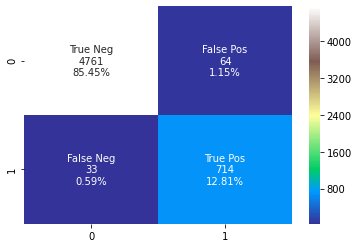

In [116]:
#heatmap for confusion matrix

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_mat.flatten()/np.sum(conf_mat)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat, annot=labels, fmt='', cmap='terrain')

In [117]:
vectorizer = TfidfVectorizer(
    input= list ,  # input is actual text
    lowercase=True,      # convert to lower case before tokenizing
    stop_words='english' # remove stop words
)
features_train_transformed = vectorizer.fit_transform(X) #gives tf idf vector
#features_test_transformed  = vectorizer.transform(x_test) #gives tf idf vector

classifier = MultinomialNB()

scores=cross_val_score(classifier,features_train_transformed,Y,cv=10,scoring='accuracy')

print(scores)

print(scores.mean())


[0.98207885 0.97849462 0.96953405 0.97849462 0.96774194 0.96588869
 0.97127469 0.97482014 0.97302158 0.98021583]
0.9741565015202756


In [118]:
y_pred = cross_val_predict(classifier,features_train_transformed, Y, cv=10)
conf_mat = confusion_matrix(Y, y_pred)
conf_mat

array([[4824,    1],
       [ 143,  604]], dtype=int64)

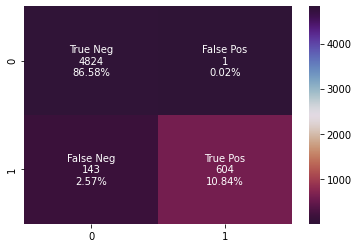

In [119]:
#heatmap for confusion matrix

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_mat.flatten()/np.sum(conf_mat)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat, annot=labels, fmt='', cmap='twilight_shifted_r')